In [1]:
# setup for visuliation
import numpy as np
import pandas as pd
import time as t
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("full_grouped.csv",index_col="Date")
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Date,,,,,,,,,
2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean


In [3]:
data.shape

(35156, 9)

In [4]:
modify_data = data.drop('Country/Region', axis=1)
modify_data

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Date,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,Eastern Mediterranean
2020-01-22,0,0,0,0,0,0,0,Europe
2020-01-22,0,0,0,0,0,0,0,Africa
2020-01-22,0,0,0,0,0,0,0,Europe
2020-01-22,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...
2020-07-27,10621,78,3752,6791,152,2,0,Eastern Mediterranean
2020-07-27,10,1,8,1,0,0,0,Africa
2020-07-27,1691,483,833,375,10,4,36,Eastern Mediterranean


In [7]:
country = data['Country/Region'].unique()
print(country)
np.size(country)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' '

187

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 2020-01-22 to 2020-07-27
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  35156 non-null  object
 1   Confirmed       35156 non-null  int64 
 2   Deaths          35156 non-null  int64 
 3   Recovered       35156 non-null  int64 
 4   Active          35156 non-null  int64 
 5   New cases       35156 non-null  int64 
 6   New deaths      35156 non-null  int64 
 7   New recovered   35156 non-null  int64 
 8   WHO Region      35156 non-null  object
dtypes: int64(7), object(2)
memory usage: 2.7+ MB


In [9]:
data["Country/Region"].value_counts()

Afghanistan    188
Pakistan       188
Nepal          188
Netherlands    188
New Zealand    188
              ... 
Georgia        188
Germany        188
Ghana          188
Greece         188
Zimbabwe       188
Name: Country/Region, Length: 187, dtype: int64

In [10]:
data["Country/Region"].value_counts().sort_values()[:5].to_frame()

,Country/Region
Afghanistan,188
Bosnia and Herzegovina,188
Algeria,188
Andorra,188
Angola,188


In [11]:
data["Country/Region"].value_counts().sort_values(ascending = False)[:5].to_frame()

,Country/Region
Afghanistan,188
Azerbaijan,188
Bosnia and Herzegovina,188
Algeria,188
Andorra,188


# UNIVARNT ANALYSIS

In [12]:
import warnings
warnings.filterwarnings("ignore")

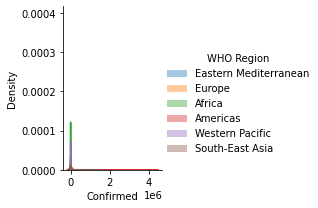

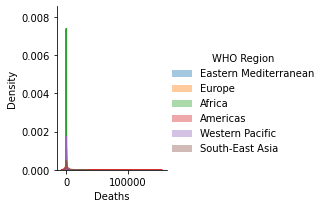

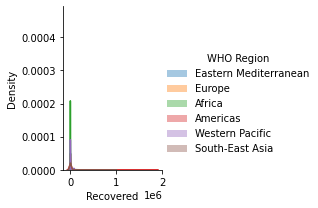

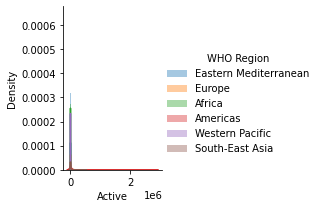

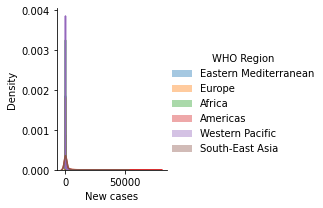

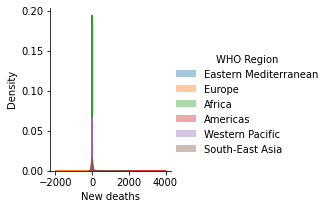

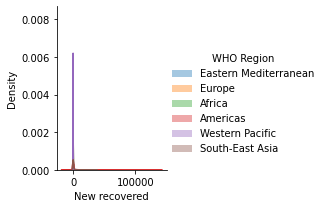

In [13]:
for columns in modify_data.columns:
    if columns != "WHO Region":
        sns.FacetGrid(modify_data, hue='WHO Region', height = 3).map(sns.distplot, columns).add_legend()
    plt.show()

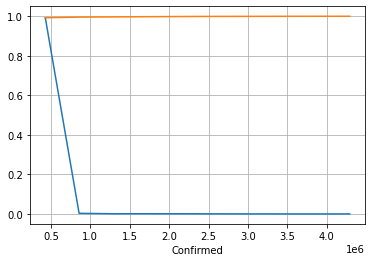

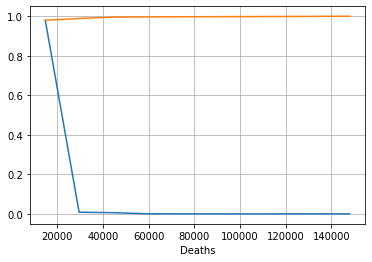

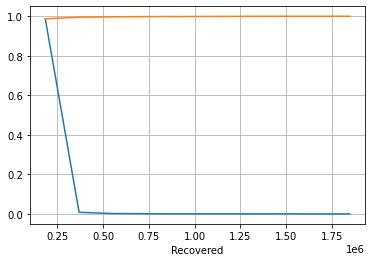

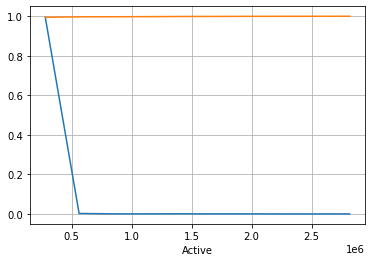

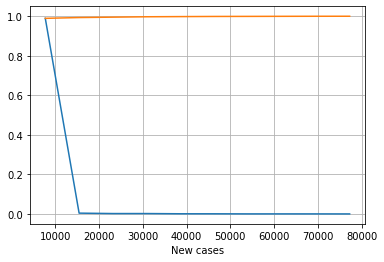

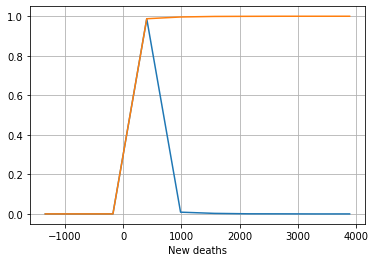

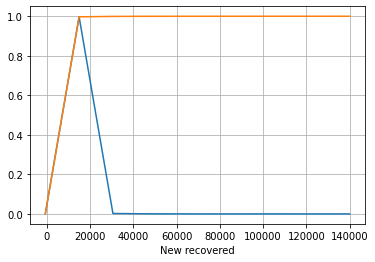

In [15]:
for column in modify_data.columns:
    if column != "WHO Region":
        counts, bin_edges = np.histogram(modify_data[column],bins=10,density = True)
        pdf = counts/(sum(counts))
        cdf = np.cumsum(pdf)
        plt.plot(bin_edges[1:],pdf)
        plt.plot(bin_edges[1:],cdf)
        plt.grid()
        plt.xlabel(column)
    plt.show()

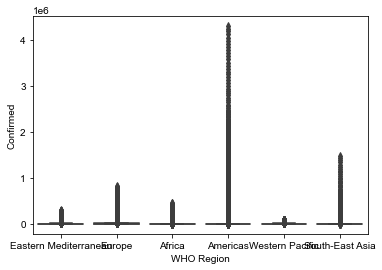

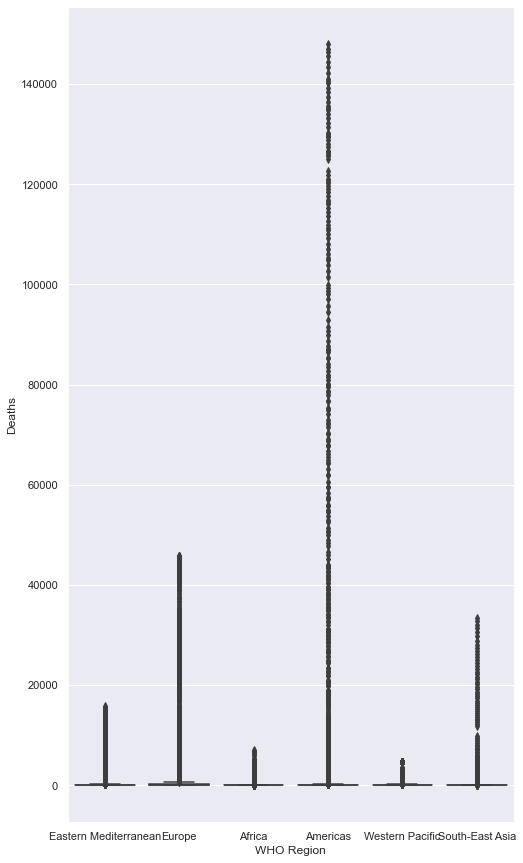

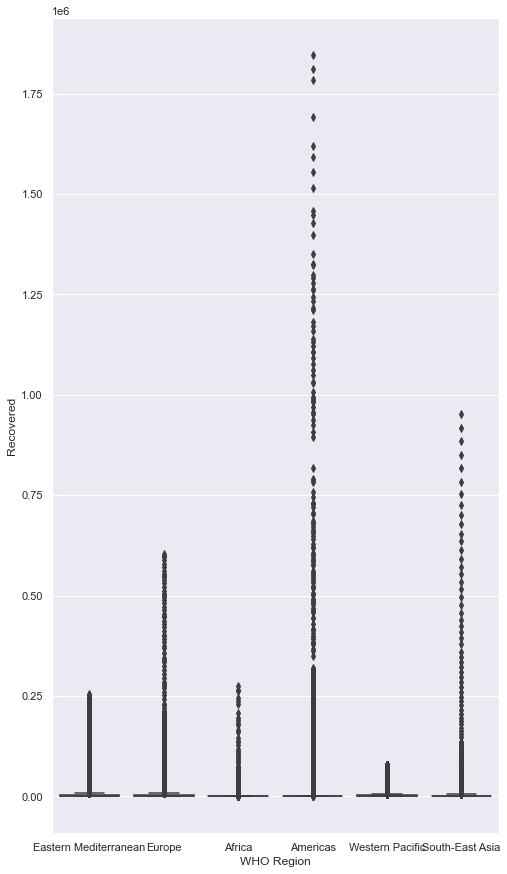

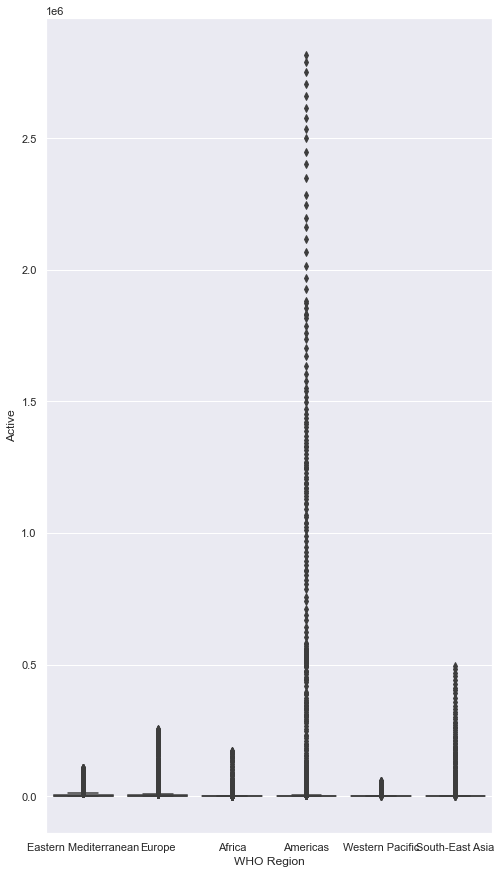

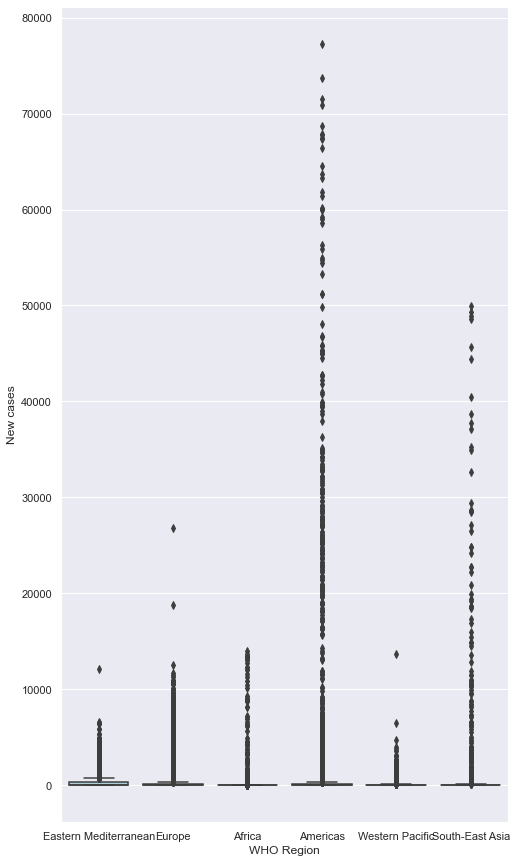

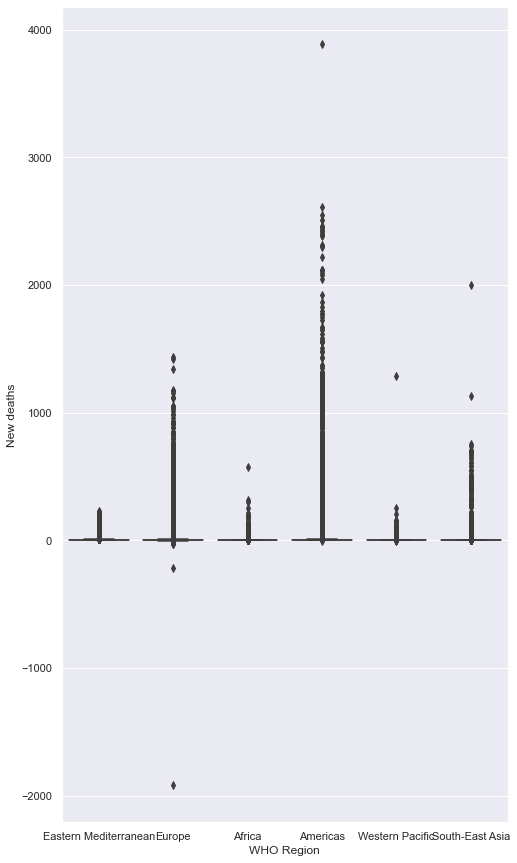

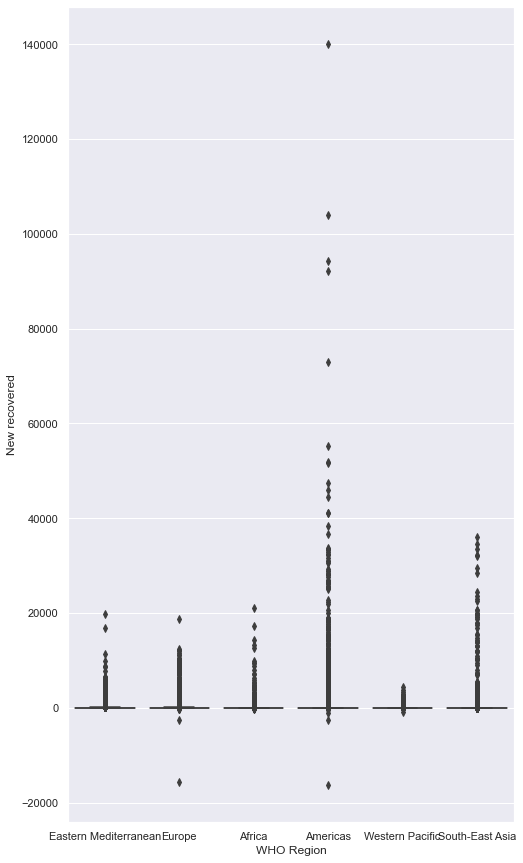

In [16]:
for column in modify_data.columns[:-1]:
    sns.boxplot(x = 'WHO Region', y = column, data = modify_data,palette="Paired")
    sns.set(rc = {'figure.figsize':(8,15)})
    plt.show()
    

# BIVARIANT ANALYSIS

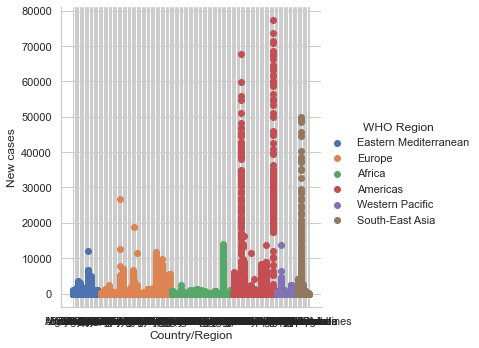

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue = "WHO Region", height=5).map(plt.scatter, "Country/Region", "New cases").add_legend()
plt.show()

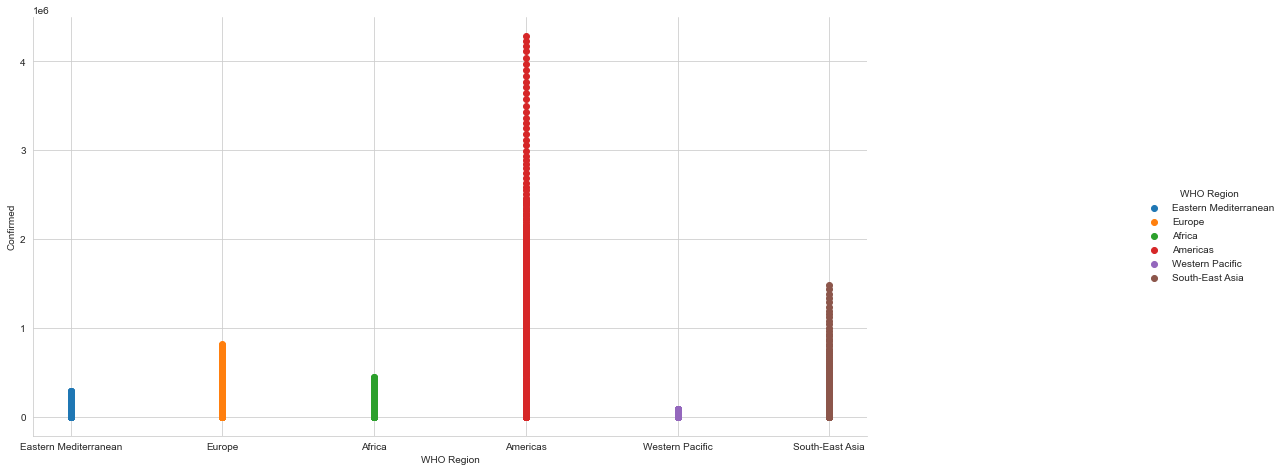

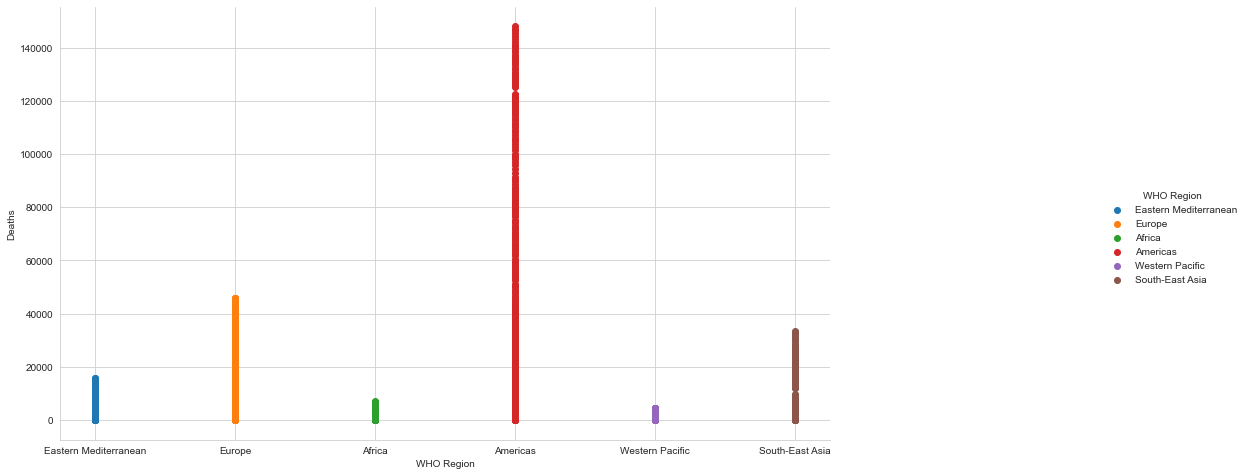

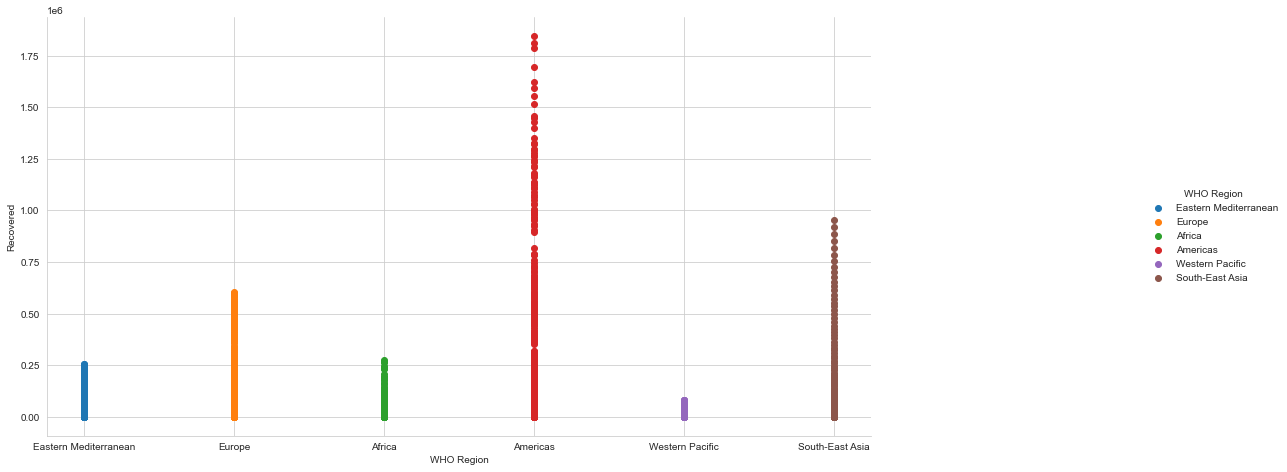

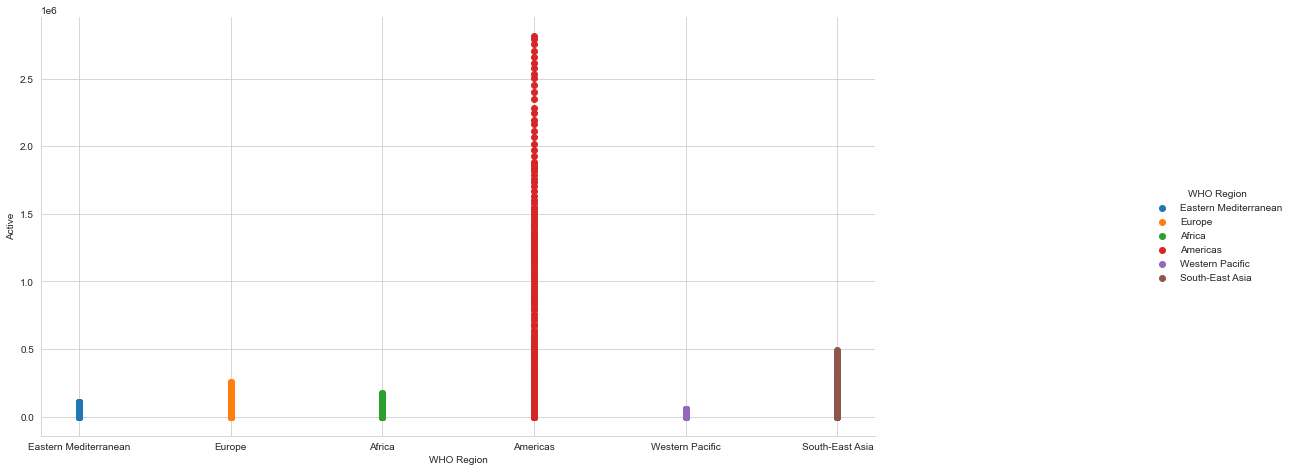

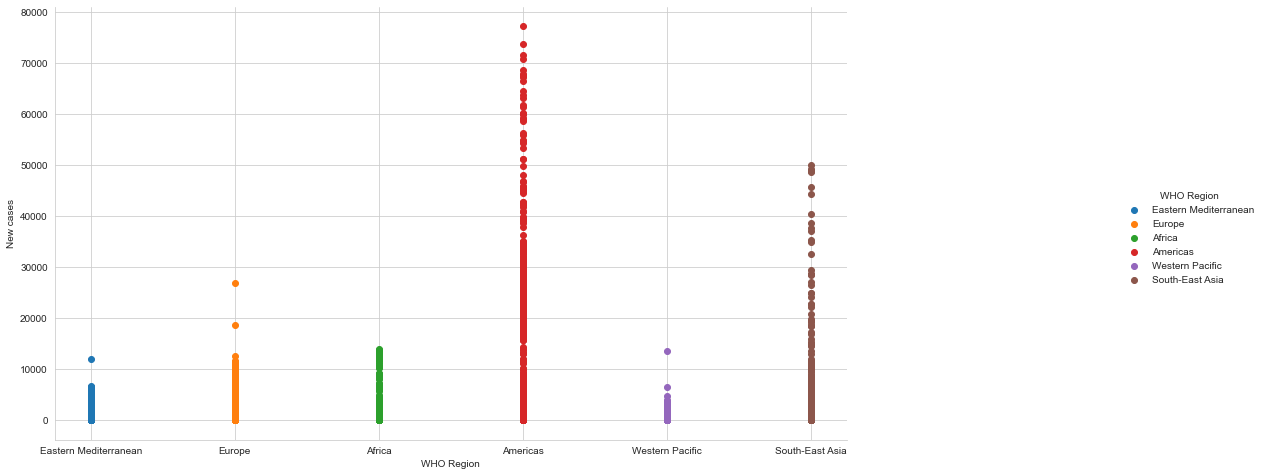

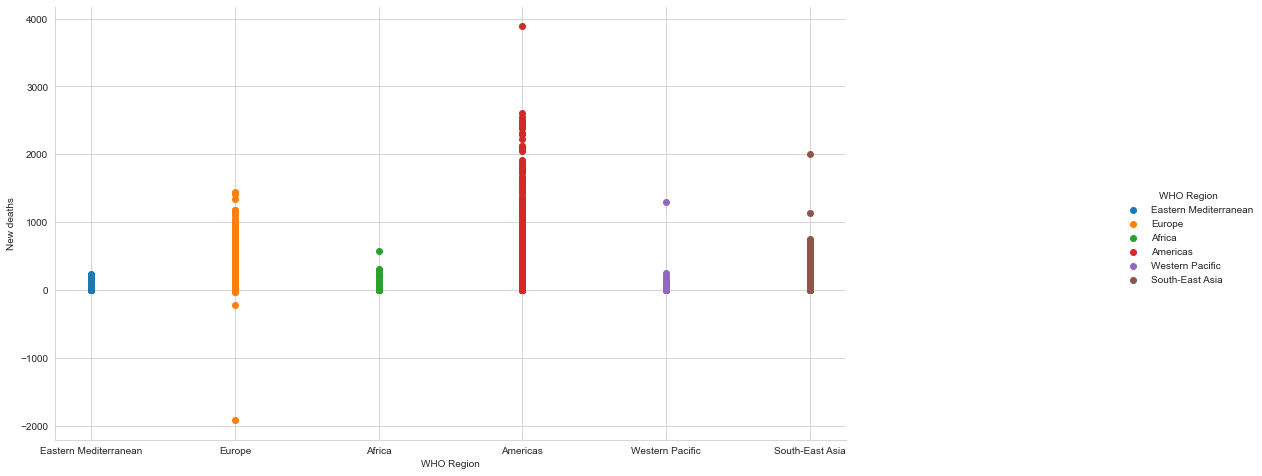

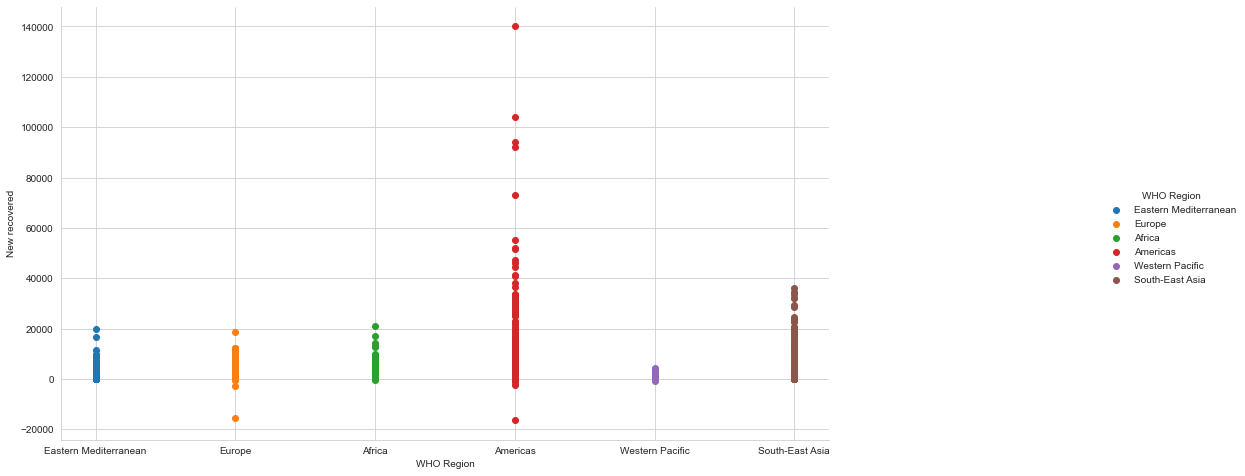

In [45]:
for column in modify_data.columns[:-1]:
    #sns.set(rc={'figure.figsize':(15,6)})
    sns.set_style("whitegrid")
#sns.pairplot(modify_data, hue ="WHO Region")
    g=sns.FacetGrid(data,hue = "WHO Region", height=5).map(plt.scatter, "WHO Region", column).add_legend()
    g.fig.set_figwidth(20)
    g.fig.set_figheight(7)
    plt.show()

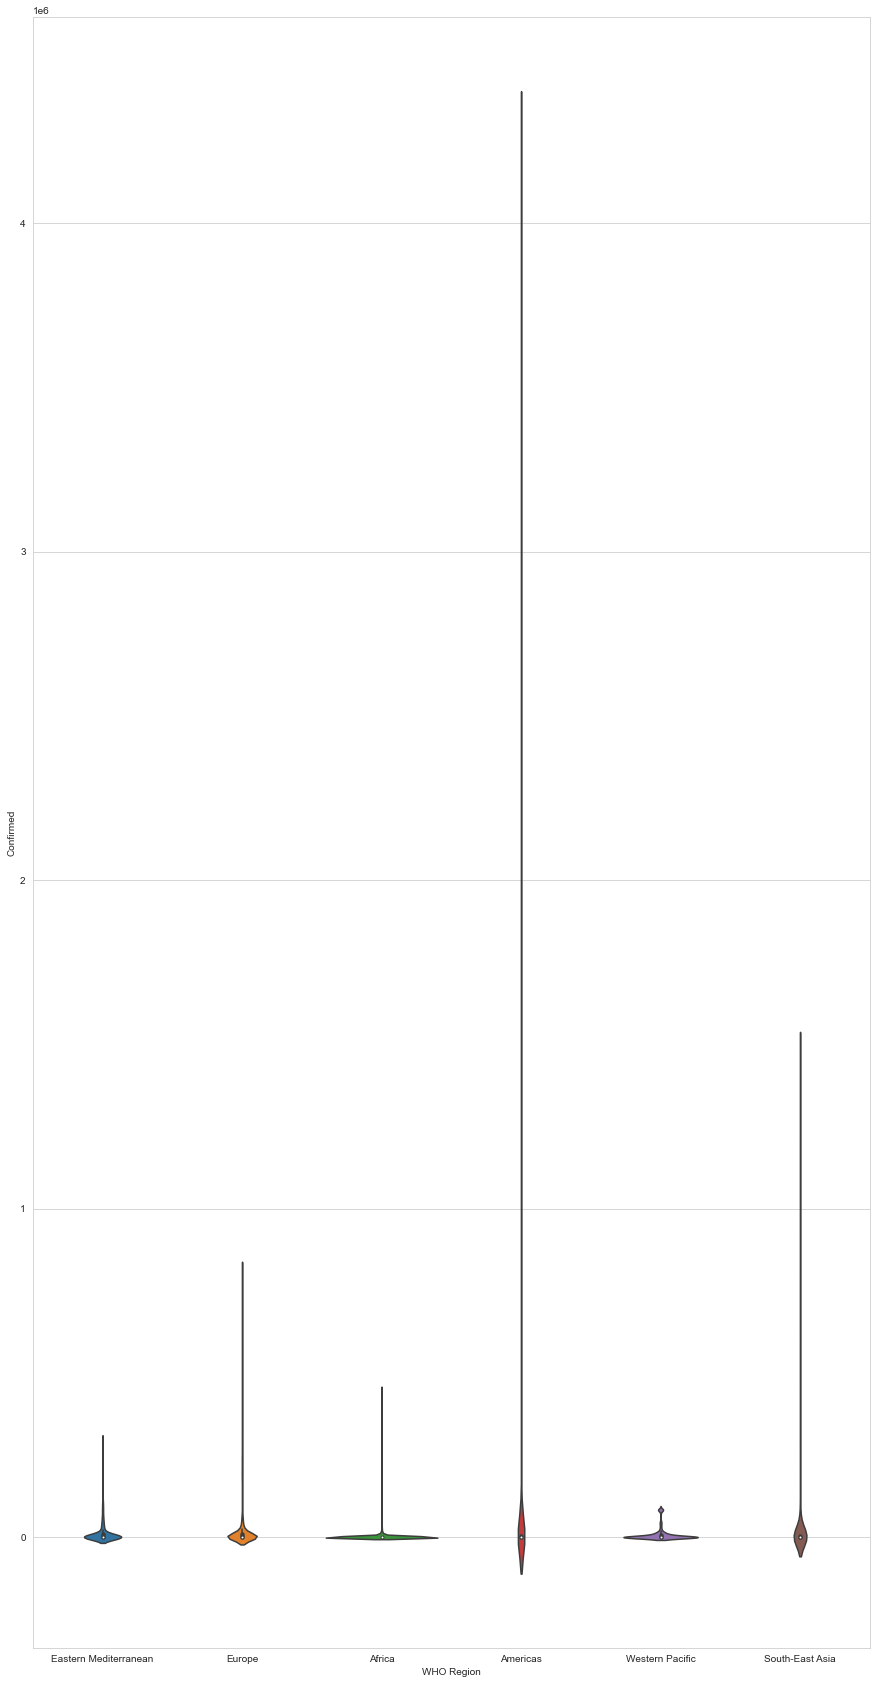

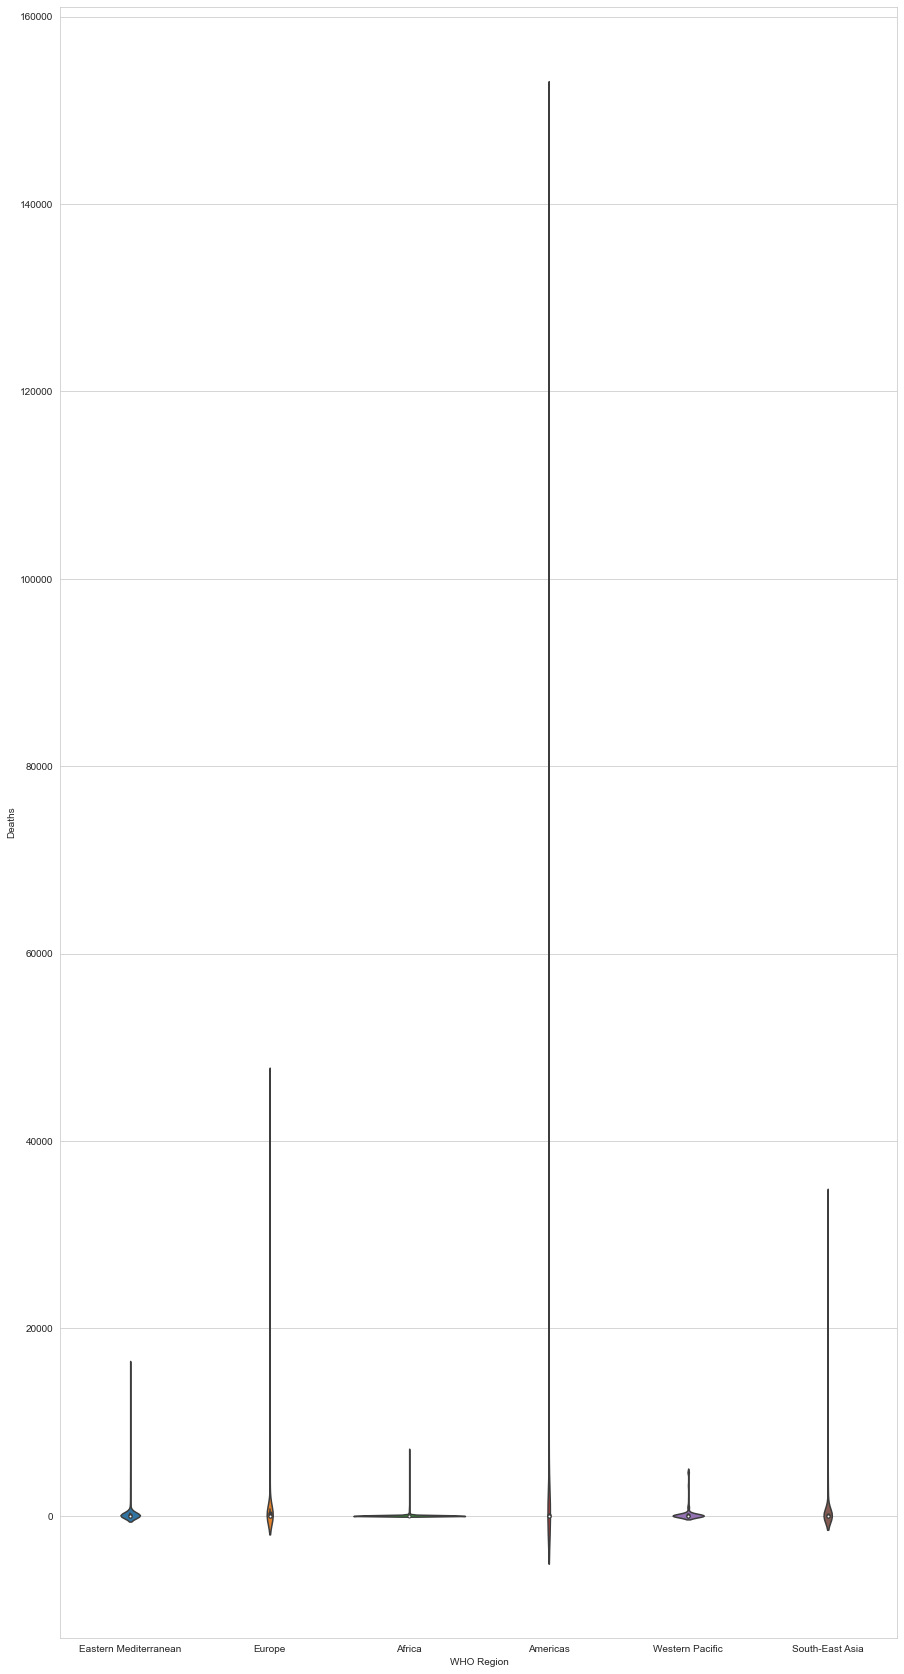

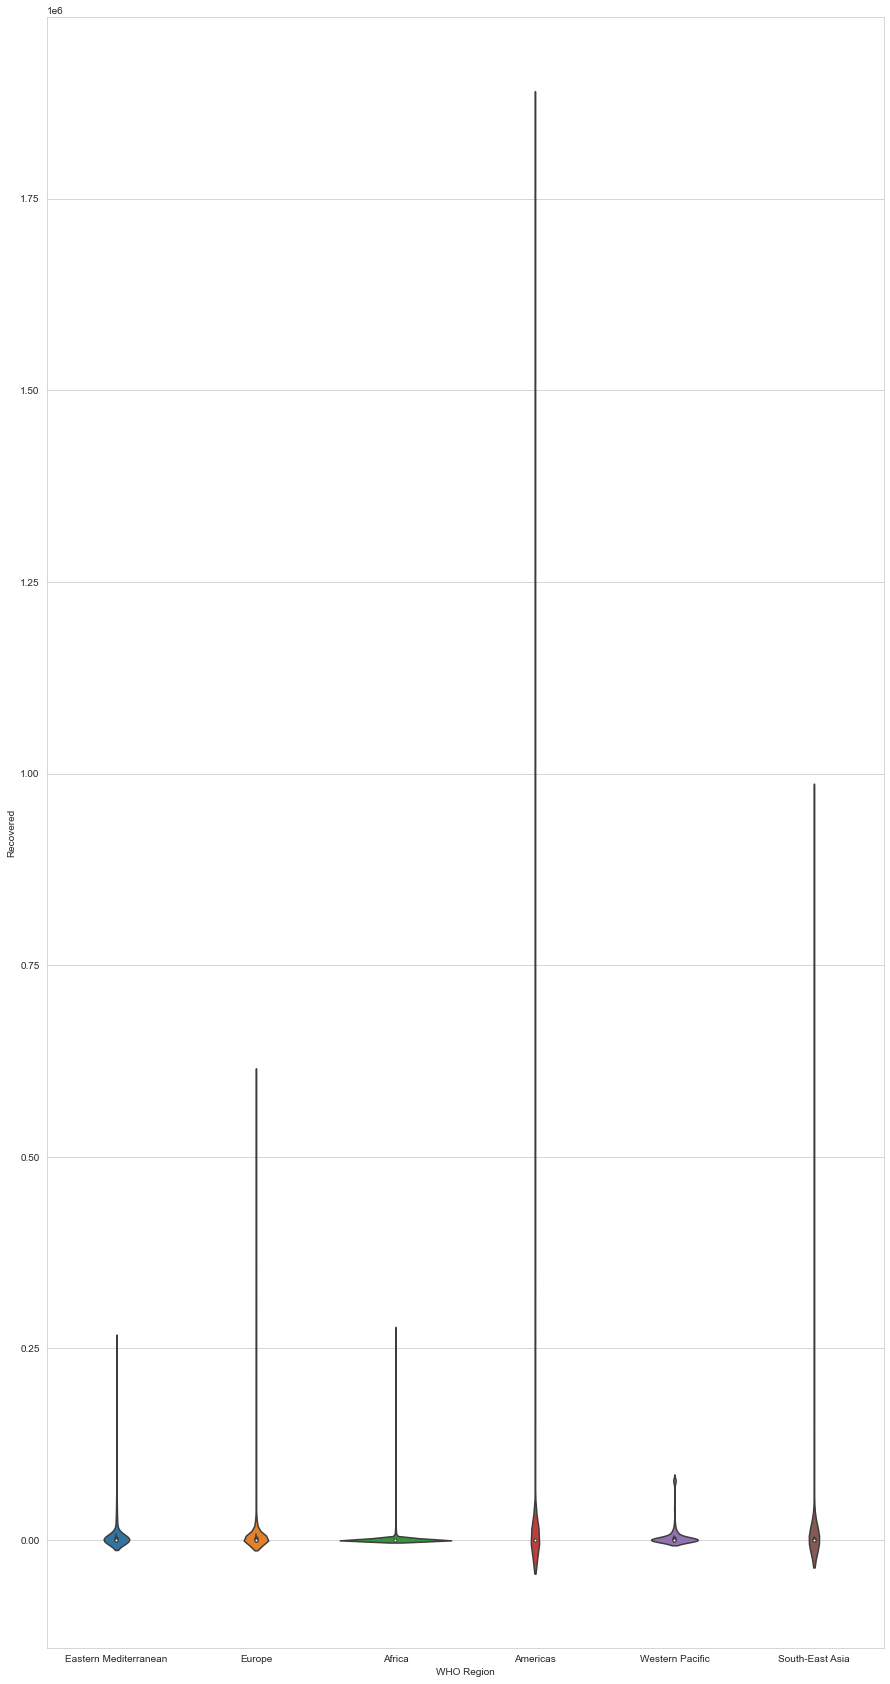

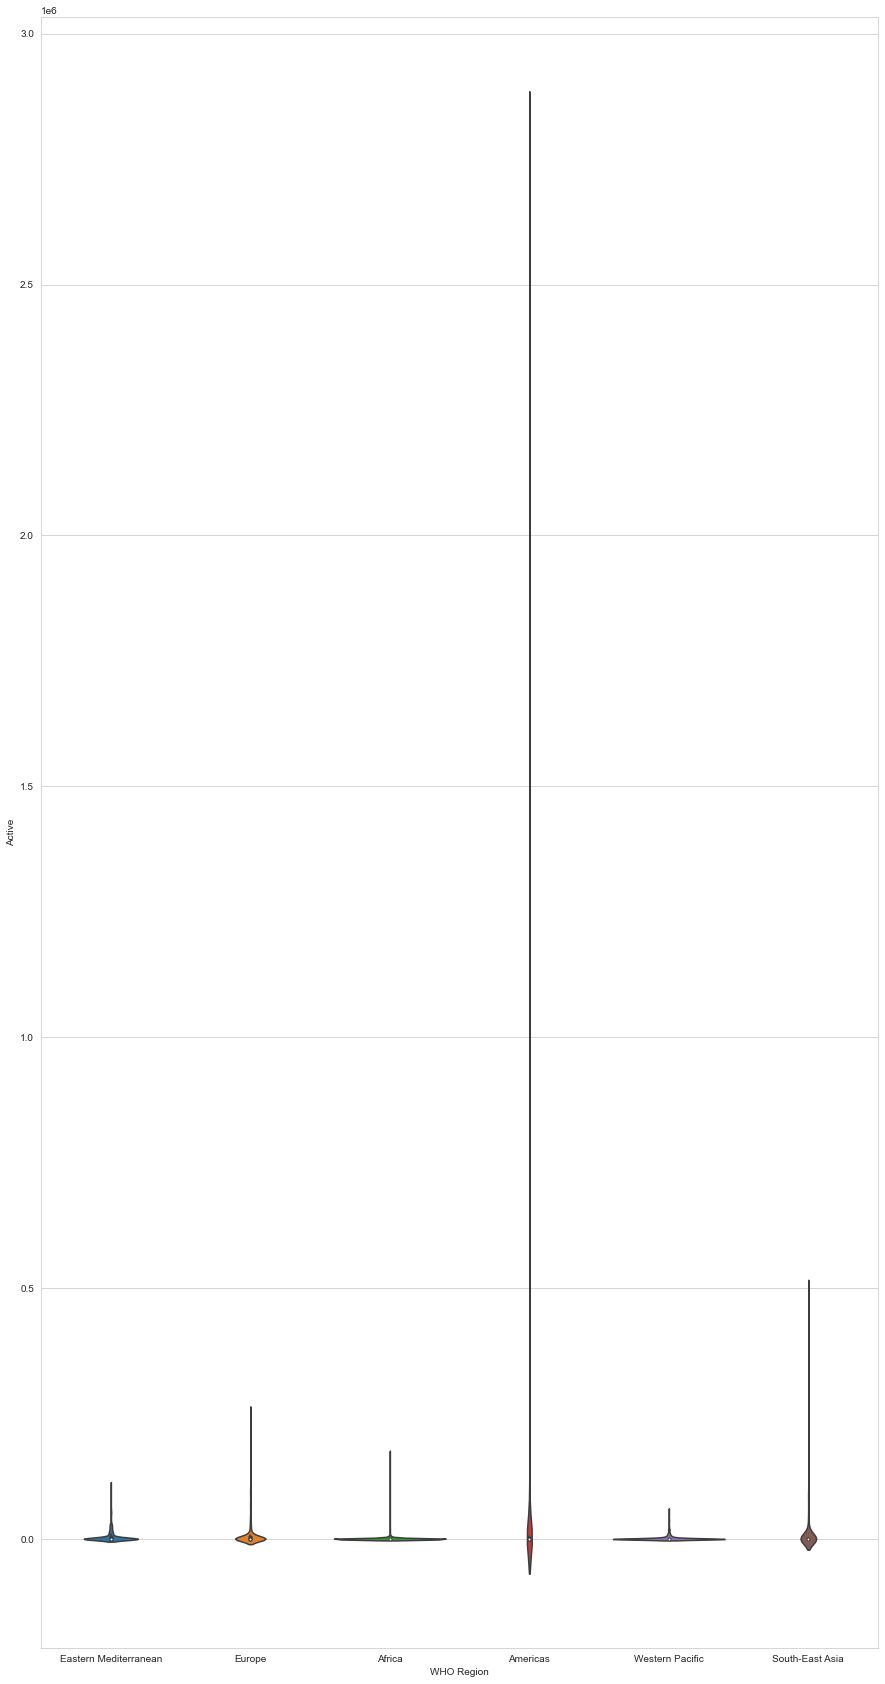

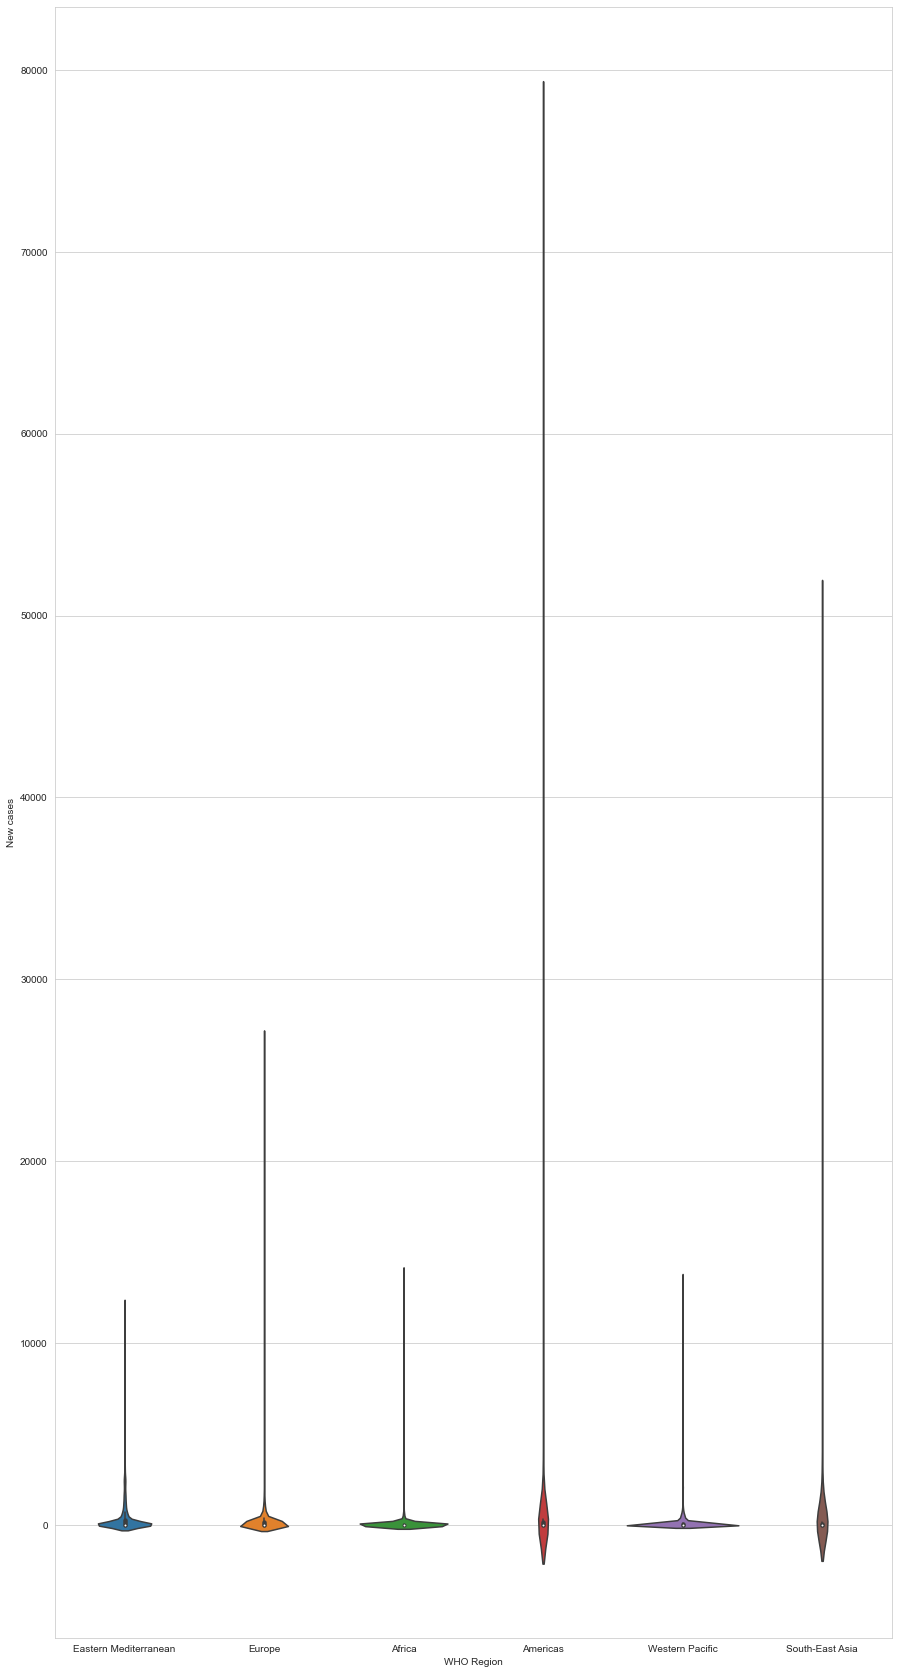

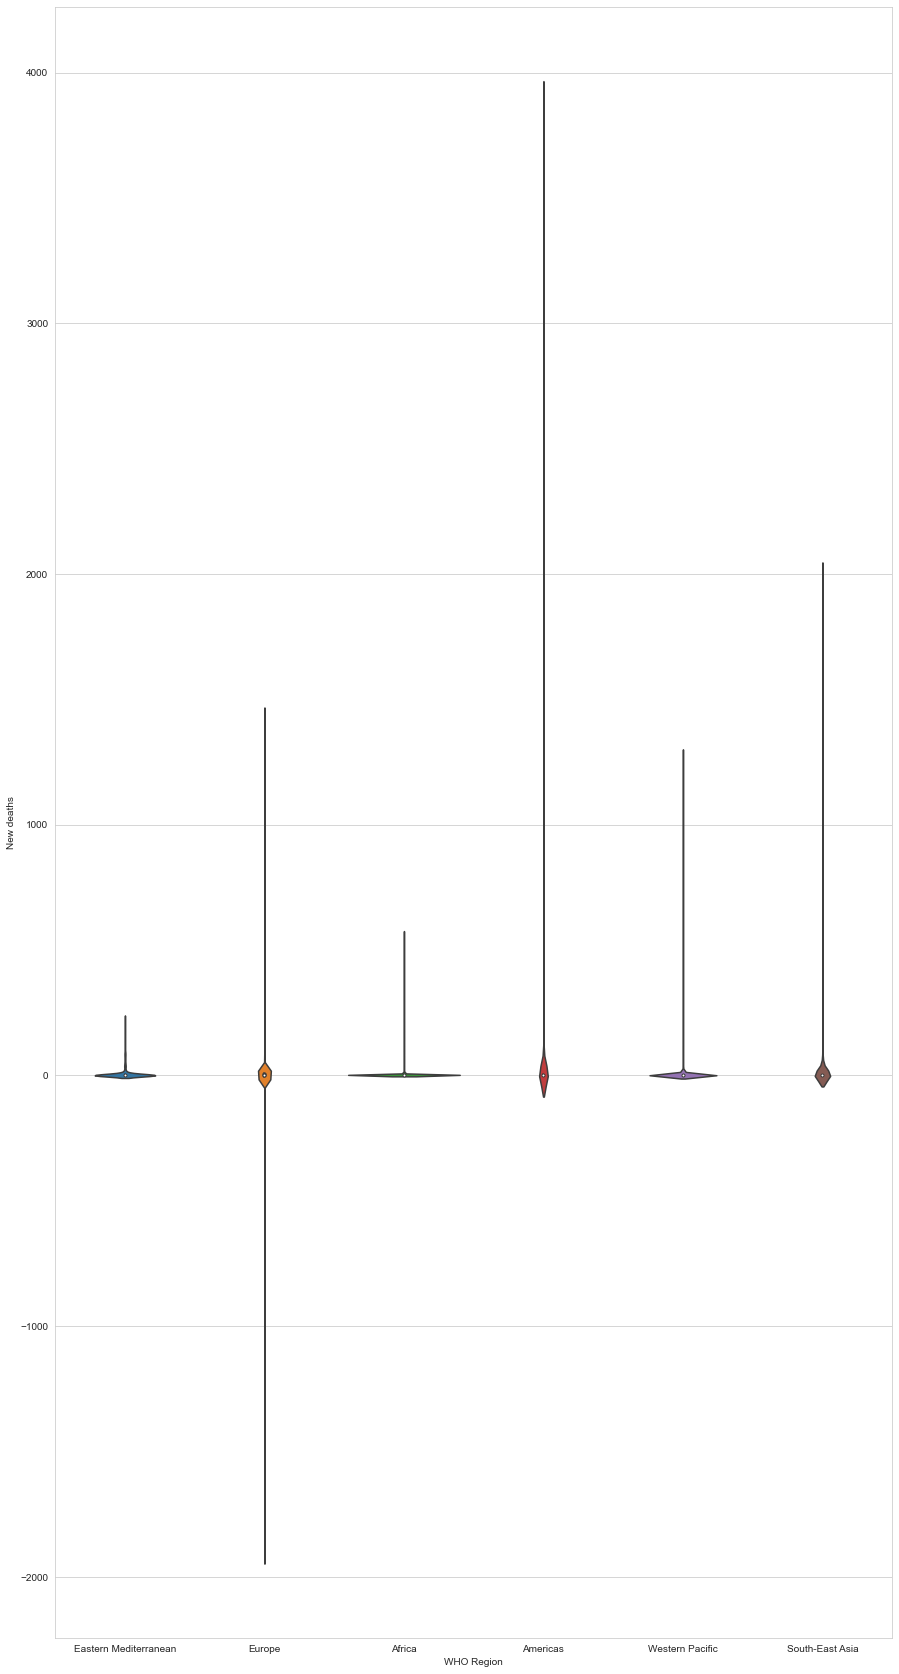

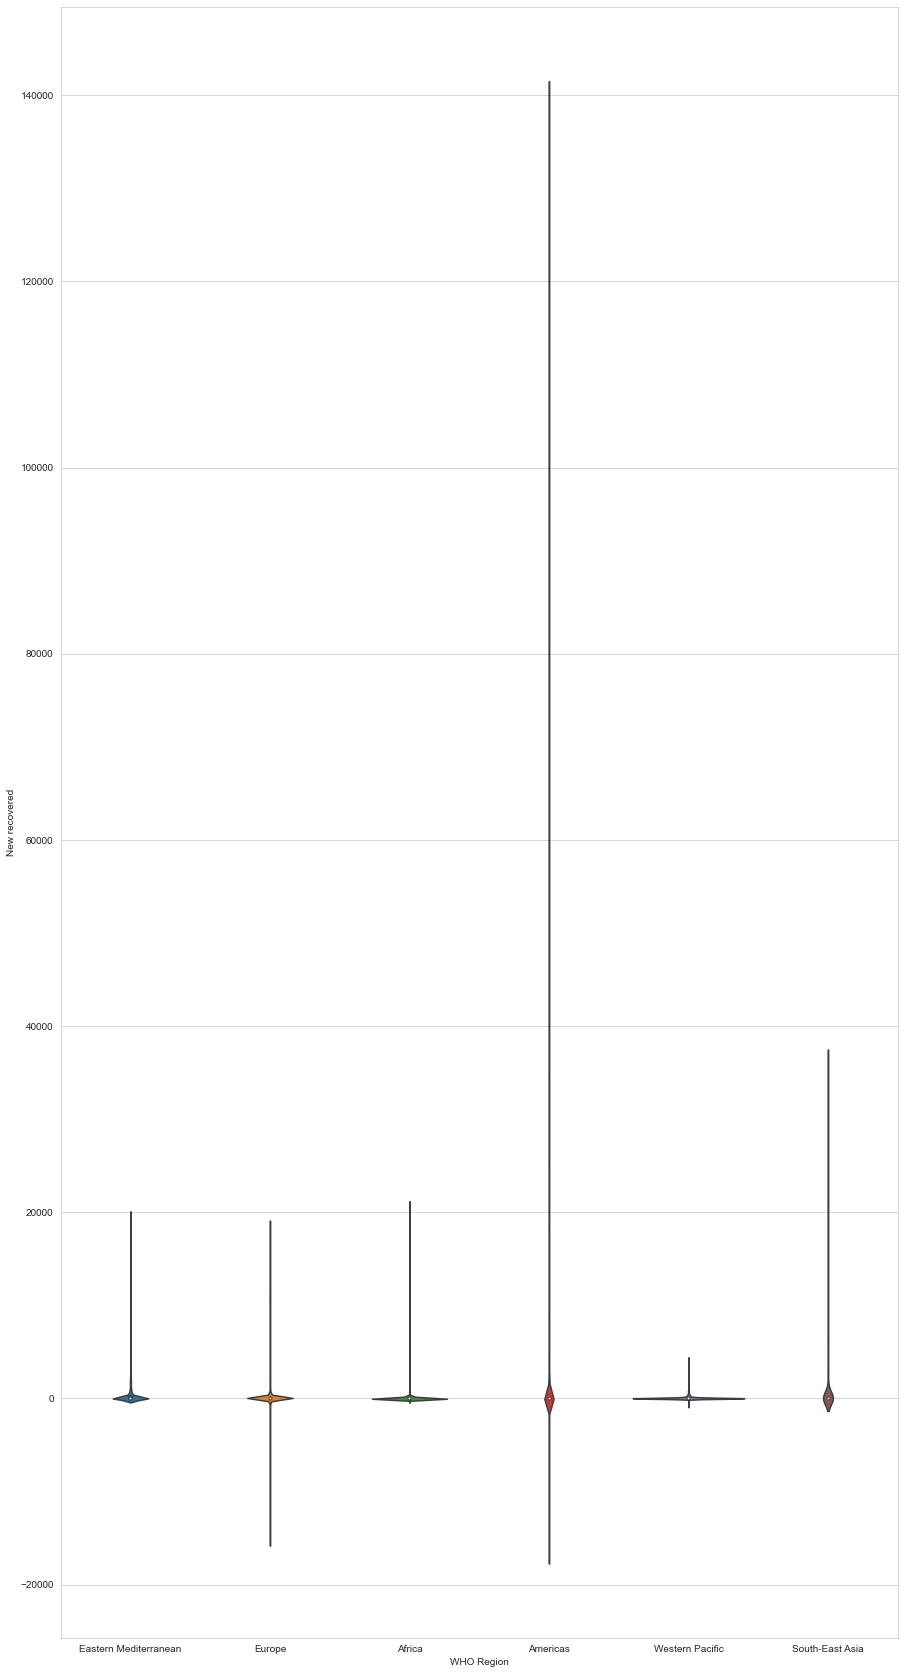

In [44]:
for column in modify_data.columns[:-1]:
    ss = (15,30)
    fig, ax = plt.subplots(figsize=ss)
    sns.violinplot(x ='WHO Region', y =column, data = modify_data)